In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory

## Obtain the Data which is Dogs vs Cats dataset 

In [4]:
data_folder = pathlib.Path('../Cat_dog_images/train_small')

In [5]:
train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


##### _The output of the above cell shows that there are:_
##### 2000 files in the train set for both the "Cats" and the "dogs"
##### 1000 files in the validation set for both the "Cats" and the "dogs"
##### 2000 files in the test set for both the "Cats" and the "dogs"

### Definning the model

In [6]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)      # 32 neurones as there are 32 filters
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [8]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [9]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 27s 425ms/step - loss: 0.7230 - accuracy: 0.5035 - val_loss: 0.6920 - val_accuracy: 0.5050
Epoch 2/20
63/63 [==============================] - 28s 442ms/step - loss: 0.6930 - accuracy: 0.5280 - val_loss: 0.6881 - val_accuracy: 0.5020
Epoch 3/20
63/63 [==============================] - 27s 421ms/step - loss: 0.6838 - accuracy: 0.5770 - val_loss: 0.6736 - val_accuracy: 0.5170
Epoch 4/20
63/63 [==============================] - 25s 404ms/step - loss: 0.6553 - accuracy: 0.6200 - val_loss: 0.6867 - val_accuracy: 0.5650
Epoch 5/20
63/63 [==============================] - 25s 402ms/step - loss: 0.6268 - accuracy: 0.6635 - val_loss: 0.5975 - val_accuracy: 0.6650
Epoch 6/20
63/63 [==============================] - 26s 411ms/step - loss: 0.5928 - accuracy: 0.6990 - val_loss: 0.5863 - val_accuracy: 0.6850
Epoch 7/20
63/63 [==============================] - 26s 410ms/step - loss: 0.5716 - accuracy: 0.7020 - val_loss: 0.5915 - val_accuracy: 0.6620

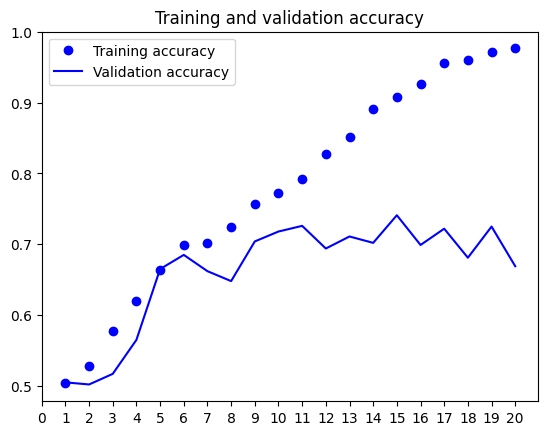

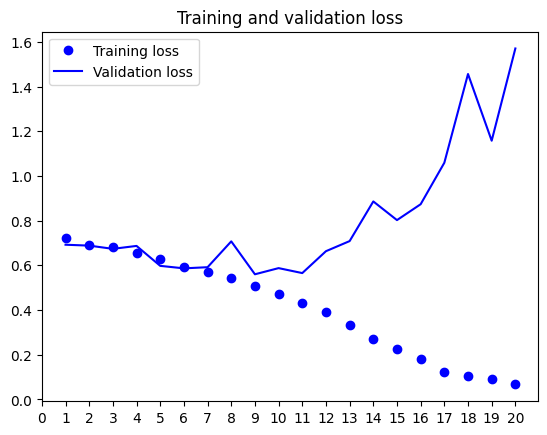

In [10]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plot accuracy
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

# Set x-axis interval to 2, starting from 0 to include the last epoch
plt.xticks(range(0, len(epochs) + 1, 1))

plt.figure()

# Plot loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

# Set x-axis interval to 2, starting from 0 to include the last epoch
plt.xticks(range(0, len(epochs) + 1, 1))

plt.show()

In [11]:
test_model = keras.models.load_model("./models/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 6s 100ms/step - loss: 0.5548 - accuracy: 0.7095
Test accuracy: 0.710


# _____________________________________________

In [12]:
conv_base = keras.applications.vgg16.VGG16( #Download an existing network, everythong exept the top 
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [14]:
data_folder = pathlib.Path('../Cat_dog_images/train_small')

train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [15]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 1s 565ms/step


In [16]:
train_features.shape

(2000, 5, 5, 512)

In [17]:
inputs = keras.Input(shape=(5, 5, 512))  #  Defining and training the top, because the bottom layer is the same as it was trained on similar real world data so the feature detectors will be the same 
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)  # it says that the output doesn't rely on the best neurones, it sets their output to 0 in 50% of times or number of epoches, if there are 4 epoches , the output will not rely on the best neurones for 2 epoches so the other nuerones will always try to be better.
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5, 5, 512)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 256)               3277056   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3,277,313
Trainable params: 3,277,313
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="./models/feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 18ms/step - loss: 22.4658 - accuracy: 0.9175 - val_loss: 7.1870 - val_accuracy: 0.9500
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 4.5174 - accuracy: 0.9700 - val_loss: 8.0146 - val_accuracy: 0.9610
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 1.9040 - accuracy: 0.9870 - val_loss: 3.5672 - val_accuracy: 0.9770
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.8447 - accuracy: 0.9895 - val_loss: 3.5097 - val_accuracy: 0.9760
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 0.7733 - accuracy: 0.9925 - val_loss: 4.5942 - val_accuracy: 0.9740
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0070 - accuracy: 0.9925 - val_loss: 4.0689 - val_accuracy: 0.9750
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.3220 - accuracy: 0.9985 - val_loss: 8.3802 - val_accuracy: 0.9680
Epoch 8/20
6

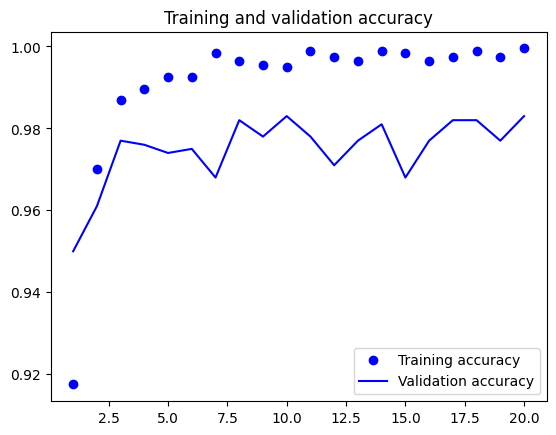

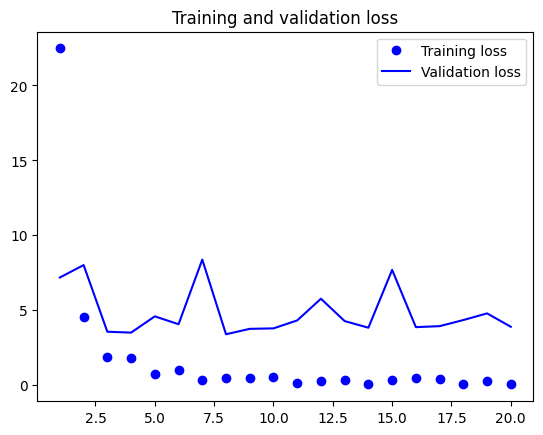

In [20]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [21]:
test_model = keras.models.load_model(
    "./models/feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(x=test_features, y=test_labels)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 0s 2ms/step - loss: 4.8599 - accuracy: 0.9760
Test accuracy: 0.976


# _____________________________________________

## Fine tuning with changing the top 4 layers in the base

In [22]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [23]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [24]:
conv_base.trainable = False  # freeze the weighs so the image will be trained with the same weights of the base
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [25]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [26]:
model.summary() #to make sure that no weight changed look at the result where "Total params: 17,992,001 and Trainable params: 3,277,313". this proves that the weights of the base are not trained and are freezed

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                           

In [27]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks) #Epoch 25 reached at min 47 min :41 sec
#Epoch 25 reached at min 49 min :30 sec
#Epoch 50 reached at min 97 min :06 sec

Epoch 1/20


63/63 [==============================] - 111s 2s/step - loss: 17.3392 - accuracy: 0.8990 - val_loss: 6.6924 - val_accuracy: 0.9600
Epoch 2/20
63/63 [==============================] - 110s 2s/step - loss: 8.1620 - accuracy: 0.9460 - val_loss: 3.2446 - val_accuracy: 0.9720
Epoch 3/20
63/63 [==============================] - 108s 2s/step - loss: 4.9234 - accuracy: 0.9595 - val_loss: 2.9183 - val_accuracy: 0.9770
Epoch 4/20
63/63 [==============================] - 112s 2s/step - loss: 4.7664 - accuracy: 0.9625 - val_loss: 7.8509 - val_accuracy: 0.9640
Epoch 5/20
63/63 [==============================] - 108s 2s/step - loss: 5.0003 - accuracy: 0.9570 - val_loss: 2.9996 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 115s 2s/step - loss: 2.9901 - accuracy: 0.9705 - val_loss: 13.4232 - val_accuracy: 0.9470
Epoch 7/20
63/63 [==============================] - 119s 2s/step - loss: 3.4647 - accuracy: 0.9755 - val_loss: 7.6417 - val_accuracy: 0.9620
Epoch 8/20
63/63 [====

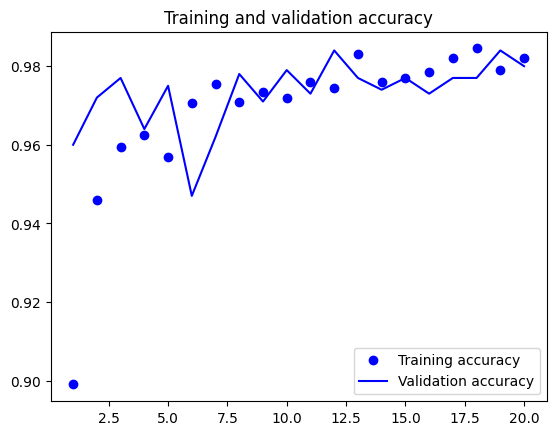

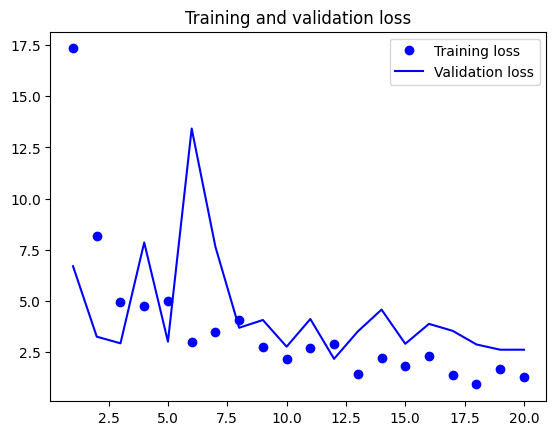

In [28]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [29]:
test_model = keras.models.load_model(
    "./models/feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 82s 1s/step - loss: 4.4983 - accuracy: 0.9745
Test accuracy: 0.975


In [30]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [31]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:  # we don't freeze the last 4 layers to check if we can modify the weights to give us a better accuracy at the end 
    layer.trainable = False

In [32]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 180, 180, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 180, 180, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                           

In [33]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 148s 2s/step - loss: 1.0455 - accuracy: 0.9840 - val_loss: 2.1114 - val_accuracy: 0.9760
Epoch 2/20
63/63 [==============================] - 146s 2s/step - loss: 0.5443 - accuracy: 0.9900 - val_loss: 2.4917 - val_accuracy: 0.9710
Epoch 3/20
63/63 [==============================] - 148s 2s/step - loss: 0.5943 - accuracy: 0.9865 - val_loss: 2.4712 - val_accuracy: 0.9750
Epoch 4/20
63/63 [==============================] - 147s 2s/step - loss: 0.4777 - accuracy: 0.9880 - val_loss: 2.1190 - val_accuracy: 0.9770
Epoch 5/20
63/63 [==============================] - 146s 2s/step - loss: 0.4719 - accuracy: 0.9890 - val_loss: 2.4859 - val_accuracy: 0.9730
Epoch 6/20
63/63 [==============================] - 149s 2s/step - loss: 0.6144 - accuracy: 0.9910 - val_loss: 1.9315 - val_accuracy: 0.9870
Epoch 7/20
63/63 [==============================] - 150s 2s/step - loss: 0.2860 - accuracy: 0.9955 - val_loss: 2.0978 - val_accuracy: 0.9740
Epoch 8/20
63

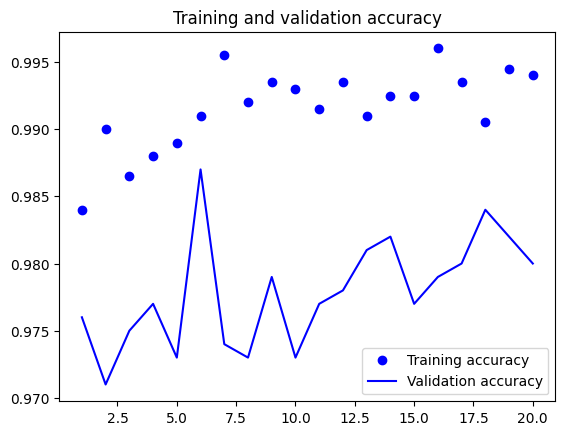

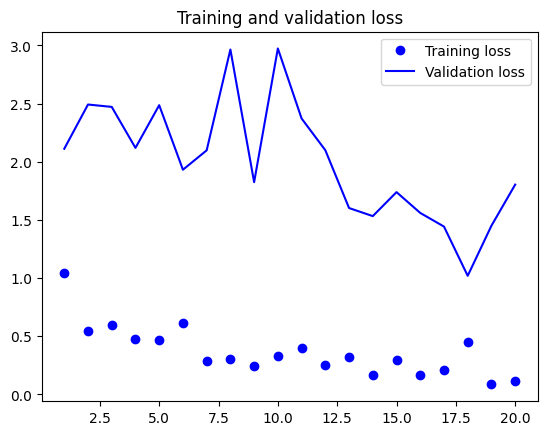

In [34]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [35]:
model = keras.models.load_model("./models/fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 296s 5s/step - loss: 1.4756 - accuracy: 0.9785
Test accuracy: 0.979


In [36]:
model = keras.models.load_model("./models/fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 67s 1s/step - loss: 1.4756 - accuracy: 0.9785
Test accuracy: 0.979
